### **1. Import the Required Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
# Import The Libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Paths
train_Path = '/content/drive/MyDrive/training_data'
test_Path = '/content/drive/MyDrive/val_data'

In [ ]:
# Set Resize variable
IMAGE_SIZE = [150, 150] # This is my desired image size... and also ResNet50 accepts image of 224*224.

In [ ]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], # Making the image into 3 Channel, so concating 3.
    weights = 'imagenet', # Default weights.
    include_top = False   #
)

In [ ]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']      

In [ ]:
for layer in resnet.layers:
    layer.trainable = False

# This will let us use the default weights used by the imagenet.

In [ ]:
# Usefule for getting number of output classes.
# folders = glob('../input/car-brand-images-dataset/Train/*')
folders = glob(train_Path + '/*')
folders

['/content/drive/MyDrive/training_data/class_JHA',
 '/content/drive/MyDrive/training_data/class_NARAYANGANJ',
 '/content/drive/MyDrive/training_data/class_MATRO',
 '/content/drive/MyDrive/training_data/class_7',
 '/content/drive/MyDrive/training_data/class_8',
 '/content/drive/MyDrive/training_data/class_5',
 '/content/drive/MyDrive/training_data/class_DHAKA',
 '/content/drive/MyDrive/training_data/class_4',
 '/content/drive/MyDrive/training_data/class_6',
 '/content/drive/MyDrive/training_data/class_9',
 '/content/drive/MyDrive/training_data/class_3',
 '/content/drive/MyDrive/training_data/class_0',
 '/content/drive/MyDrive/training_data/class_1',
 '/content/drive/MyDrive/training_data/class_2',
 '/content/drive/MyDrive/training_data/class_k',
 '/content/drive/MyDrive/training_data/class_ga',
 '/content/drive/MyDrive/training_data/class_LA']

In [ ]:
labels = {value: key for key, value in test_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : class_0
1 : class_1
2 : class_2
3 : class_3
4 : class_4
5 : class_5
6 : class_6
7 : class_7
8 : class_8
9 : class_9
10 : class_DHAKA
11 : class_JHA
12 : class_LA
13 : class_MATRO
14 : class_NARAYANGANJ
15 : class_ga
16 : class_k


In [ ]:
# Set the flatten layer.
x = Flatten() (resnet.output)

In [ ]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [ ]:
# Create a model Object
model = Model(inputs = resnet.input, outputs = prediction)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 75, 75, 64)   256         ['conv1_conv[0][0]']       

In [ ]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 1,
    class_mode = 'categorical' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 1292 images belonging to 17 classes.


In [ ]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 1,
    class_mode = 'categorical'
)

Found 429 images belonging to 17 classes.


In [ ]:
# Fir the model.

history = model.fit(
    training_set,
    validation_data = test_set,
    epochs = 30,
    steps_per_epoch = len(training_set),
    validation_steps = len(test_set)
)

Epoch 1/30
1292/1292 [==============================] - 278s 210ms/step - loss: 1.4527 - accuracy: 0.5550 - val_loss: 1.2263 - val_accuracy: 0.6200
Epoch 2/30
1292/1292 [==============================] - 243s 188ms/step - loss: 1.2461 - accuracy: 0.5836 - val_loss: 1.0574 - val_accuracy: 0.6480
Epoch 3/30
1292/1292 [==============================] - 247s 191ms/step - loss: 1.2224 - accuracy: 0.6107 - val_loss: 0.9544 - val_accuracy: 0.7296
Epoch 4/30
1292/1292 [==============================] - 244s 189ms/step - loss: 1.1793 - accuracy: 0.6200 - val_loss: 0.8946 - val_accuracy: 0.6993
Epoch 5/30
1292/1292 [==============================] - 265s 205ms/step - loss: 1.1036 - accuracy: 0.6293 - val_loss: 1.0206 - val_accuracy: 0.6760
Epoch 6/30
1292/1292 [==============================] - 265s 205ms/step - loss: 1.0994 - accuracy: 0.6602 - val_loss: 0.9610 - val_accuracy: 0.6643
Epoch 7/30
1292/1292 [==============================] - 265s 205ms/step - loss: 1.0689 - accuracy: 0.6509 - val_

In [ ]:
test_dataset = '/content/drive/MyDrive/testing_data'

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=1,
                                                 target_size = (150, 150),
                                                 class_mode='categorical')

Found 303 images belonging to 17 classes.


### **7. Model Prediction on the Test Dataset**

In [ ]:
predictions = model.predict(test_generator)

303/303 [==============================] - 45s 145ms/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator, batch_size=1)

303/303 [==============================] - 48s 135ms/step - loss: 0.9718 - accuracy: 0.7393


In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.9717695116996765
Test Accuracy: 0.7392739057540894


The test loss and test accuracy is the same as validation loss and validation accuracy at the last step since the testing and validation datasets are same.

### **8. Plotting the Classification Metrics**

### **i. Confusion Matrix**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping


In [ ]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

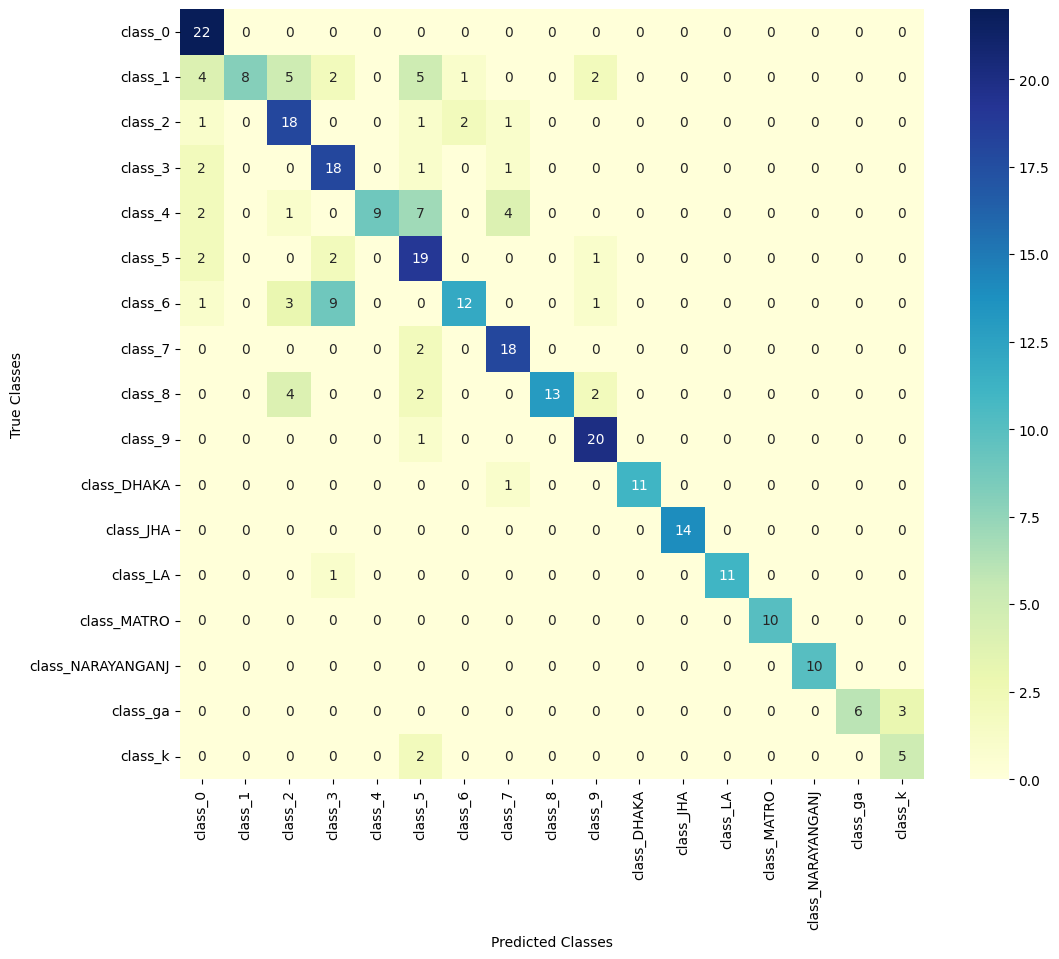

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
box_labels = np.asarray(group_counts).reshape(cf_mtx.shape[0], cf_mtx.shape[1])

plt.figure(figsize=(12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
            cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()


In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                   precision    recall  f1-score   support

          class_0       0.00      0.00      0.00        22
          class_1       0.00      0.00      0.00        27
          class_2       0.00      0.00      0.00        23
          class_3       0.46      0.59      0.52        22
          class_4       1.00      0.35      0.52        23
          class_5       0.37      0.71      0.49        24
          class_6       0.00      0.00      0.00        26
          class_7       0.17      0.90      0.28        20
          class_8       0.28      0.62      0.38        21
          class_9       1.00      0.24      0.38        21
      class_DHAKA       1.00      0.17      0.29        12
        class_JHA       1.00      0.14      0.25        14
         class_LA       0.45      0.83      0.59        12
      class_MATRO       0.50      0.90      0.64        10
class_NARAYANGANJ       0.90      0.90      0.90        10
         class_ga       1.00      0.67      0.80       